<div style="width: 38.5%;">
    <p><strong>City College of San Francisco</strong><p>
    <hr>
    <p>MATH 108 - Foundations of Data Science</p>
</div>

# Lecture 12: Table Examples

Associated Textbook Sections: [8.5](https://inferentialthinking.com/chapters/08/5/Bike_Sharing_in_the_Bay_Area.html)

<h2>Set Up the Notebook<h2>

In [1]:
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
#import warnings
#warnings.simplefilter(action='ignore',category=np.VisibleDeprecationWarning)

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Lecture-12:-Table-Examples" data-toc-modified-id="Lecture-12:-Table-Examples-1">Lecture 12: Table Examples</a></span><ul class="toc-item"><li><span><a href="#Set-Up-the-Notebook" data-toc-modified-id="Set-Up-the-Notebook-1.1">Set Up the Notebook</a></span></li><li><span><a href="#" data-toc-modified-id="-1.2"></a></span></li><li><span><a href="#Table-Examples" data-toc-modified-id="Table-Examples-1.3">Table Examples</a></span><ul class="toc-item"><li><span><a href="#Demo:-Billionaires" data-toc-modified-id="Demo:-Billionaires-1.3.1">Demo: Billionaires</a></span></li><li><span><a href="#Demo:-Meteorites" data-toc-modified-id="Demo:-Meteorites-1.3.2">Demo: Meteorites</a></span></li><li><span><a href="#Demo:-Maps" data-toc-modified-id="Demo:-Maps-1.3.3">Demo: Maps</a></span></li><li><span><a href="#Demo:-Bikes" data-toc-modified-id="Demo:-Bikes-1.3.4">Demo: Bikes</a></span></li><li><span><a href="#Demo:-Maps,-Again" data-toc-modified-id="Demo:-Maps,-Again-1.3.5">Demo: Maps, Again</a></span></li></ul></li></ul></li></ul></div>

## Table Examples

### Demo: Billionaires

Load the `billionairs.csv` data and visualize the distribution of `'citizenship'` and `'industry'`.

In [2]:
billionaires = Table.read_table('billionaires.csv')
billionaires

name,net worth,citizenship,industry
Jeff Bezos,115739645754,United States,Technology
Bill Gates,115488591742,United States,Technology
Bernard Arnault,102244728472,France,Consumer
Warren Buffett,89408278188,United States,Diversified
Mark Zuckerberg,83053011017,United States,Technology
Amancio Ortega,73839366133,Spain,Retail
Larry Page,69933009751,United States,Technology
Sergey Brin,67825250468,United States,Technology
Carlos Slim,62527178289,Mexico,Diversified
Charles Koch,61046822719,United States,Industrial


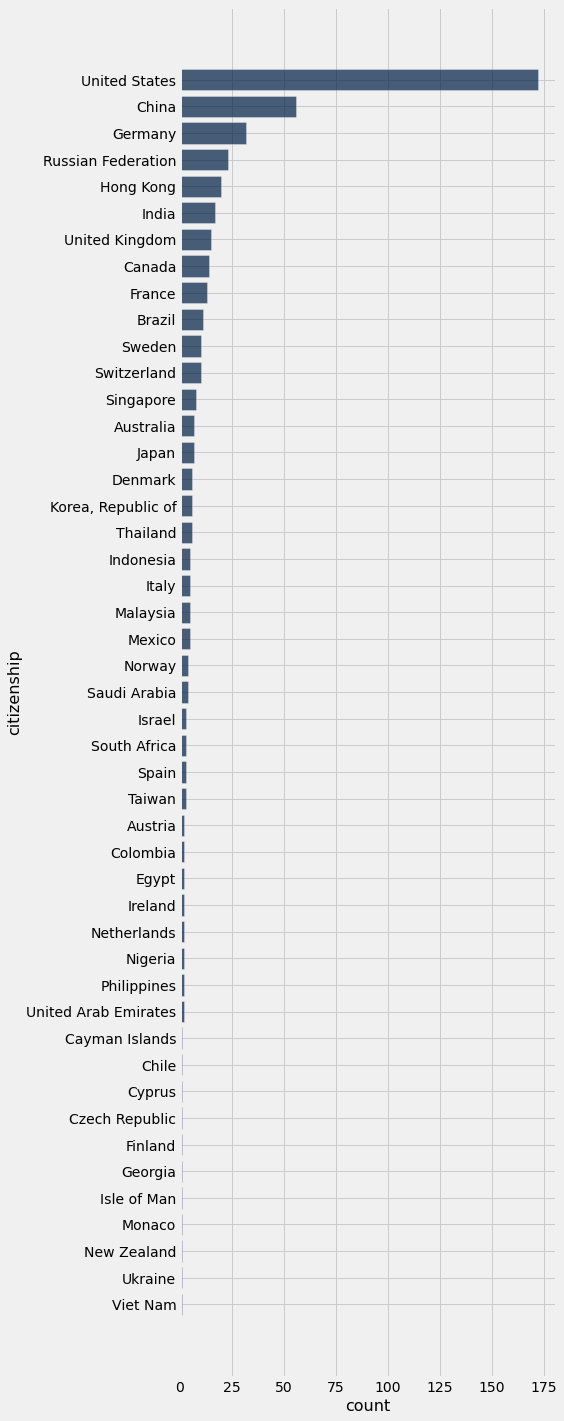

In [4]:
(billionaires.group('citizenship')
        .sort(1, descending=True)
        .barh('citizenship'))

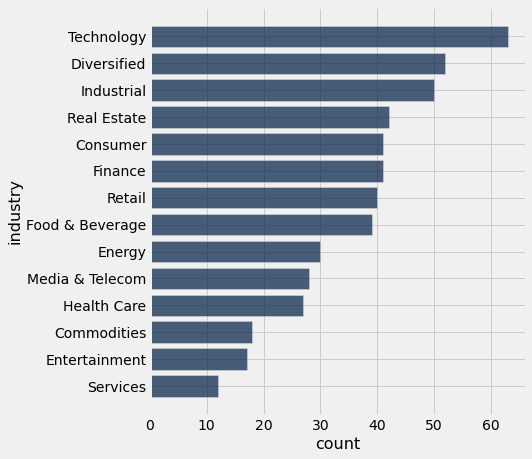

In [5]:
(billionaires.group('industry')
             .sort(1, descending=True)
             .barh('industry'))

Cross-classify the billionaires based on industry and citizenship.

In [6]:
billionaires.pivot('industry', 'citizenship').show()

/opt/conda/lib/python3.9/site-packages/datascience/tables.py:920: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  values = np.array(tuple(values))


citizenship,Commodities,Consumer,Diversified,Energy,Entertainment,Finance,Food & Beverage,Health Care,Industrial,Media & Telecom,Real Estate,Retail,Services,Technology
Australia,2,0,0,0,0,0,0,0,1,0,2,0,0,2
Austria,0,0,0,0,1,0,1,0,0,0,0,0,0,0
Brazil,1,0,0,0,0,5,3,0,1,0,0,0,0,1
Canada,1,0,0,1,0,0,1,0,0,7,0,3,0,1
Cayman Islands,0,0,0,0,0,1,0,0,0,0,0,0,0,0
Chile,1,0,0,0,0,0,0,0,0,0,0,0,0,0
China,1,6,2,3,0,1,5,6,4,0,7,2,4,15
Colombia,0,0,0,0,0,1,1,0,0,0,0,0,0,0
Cyprus,0,0,0,0,0,0,0,0,1,0,0,0,0,0
Czech Republic,0,0,1,0,0,0,0,0,0,0,0,0,0,0


Load the `countries.csv` data, and join that data with the data in the billionaires table based on the citizenship country of the billionaire.

In [7]:
countries = Table.read_table('countries.csv')
countries

Continent,Country
Africa,Algeria
Africa,Angola
Africa,Benin
Africa,Botswana
Africa,Burkina
Africa,Burundi
Africa,Cameroon
Africa,Cape Verde
Africa,Central African Republic
Africa,Chad


In [8]:
countries.where('Continent', 'North America')

Continent,Country
North America,Antigua and Barbuda
North America,Bahamas
North America,Barbados
North America,Belize
North America,Canada
North America,Cayman Islands
North America,Costa Rica
North America,Cuba
North America,Dominica
North America,Dominican Republic


Cross-classify the billionaires based on industry and continent values.

In [9]:
billionaires = billionaires.join('citizenship', countries, 'Country')
billionaires

citizenship,name,net worth,industry,Continent
Australia,Gina Rinehart,19984845036,Commodities,Oceania
Australia,Andrew Forrest,10221458789,Commodities,Oceania
Australia,Harry Triguboff,9467000000,Real Estate,Oceania
Australia,Scott Farquhar,9335988154,Technology,Oceania
Australia,Mike Cannon-Brookes,9335988154,Technology,Oceania
Australia,Frank Lowy,6655432824,Real Estate,Oceania
Australia,Anthony Pratt,6566000000,Industrial,Oceania
Austria,Dietrich Mateschitz,12251315379,Food & Beverage,Europe
Austria,Johann Graf,6509183360,Entertainment,Europe
Brazil,Jorge Paulo Lemann,23056345424,Food & Beverage,South America


In [10]:
billionaires.pivot('industry', 'Continent')


Continent,Commodities,Consumer,Diversified,Energy,Entertainment,Finance,Food & Beverage,Health Care,Industrial,Media & Telecom,Real Estate,Retail,Services,Technology
Africa,0,0,2,0,0,0,1,0,2,2,0,0,0,0
Asia,7,10,27,12,4,4,11,11,21,3,23,8,6,21
Europe,1,17,13,1,4,1,9,10,21,4,5,15,4,6
North America,6,14,10,17,9,29,14,6,4,19,12,17,2,33
Oceania,2,0,0,0,0,1,0,0,1,0,2,0,0,2
South America,2,0,0,0,0,6,4,0,1,0,0,0,0,1


Load the `ceo.csv` data and visualize the distribution of values of `'amount'` that represent the contribution amount toward the given political party.  Donations to Democratic candidates are coded as part = 100, and Republican corresponds to party = 200.

In [11]:
ceos = Table.read_table('ceo.csv')
ceos

company,ceo,party,amount
3M Co,Bob Ulrich,200,8500
3M Co,Linda Alvarado,100,11244.6
3M Co,Robert Ulrich,200,591450
AES Corporation,Andres Gluski,100,6000
AES Corporation,Charles Rossotti,100,2500
AES Corporation,Charles Rossotti,200,1000
AES Corporation,John Koskinen,100,19000
AES Corporation,Kristina Johnson,100,28480
AES Corporation,Philip Lader,100,2500
AES Corporation,Philip Odeen,100,750


/opt/conda/lib/python3.9/site-packages/datascience/tables.py:5206: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_xticklabels(ticks, rotation='vertical')


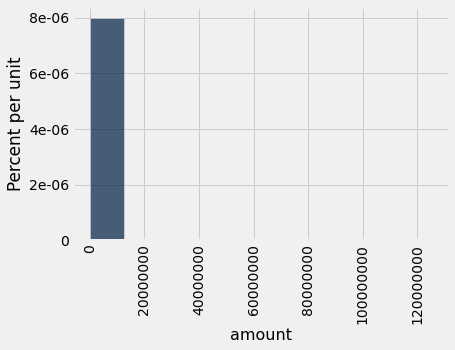

In [12]:
ceos.hist('amount')

In [13]:
ceos.sort('amount', descending=True)

company,ceo,party,amount
Hewlett-Packard Co,Margaret Whitman,200,1.25273e+08
Caterpillar Inc,Jon Huntsman,200,1.27686e+07
Las Vegas Sands,Sheldon Adelson,200,6.20425e+06
Las Vegas Sands,Sheldon g Adelson,200,5e+06
Visteon,Harry Wilson,200,4.0304e+06
Yahoo! Inc,Daniel Loeb,200,2.51255e+06
YRC Worldwide Inc,Matthew Doheny,200,1.47332e+06
Charles Schwab Corp,Charles Schwab,200,1.2364e+06
DTE Energy,James Nicholson,200,986850
Limited Brance,Leslie Wexner,200,942800


In [14]:
ceos.sort('amount', descending=False)

company,ceo,party,amount
Bristol-Myers Squibb Company,Robert Williams,100,9
Amgen Inc,Gil Omenn,100,10
Bristol-Myers Squibb Company,Michael Grobstein,100,10
Caterpillar Inc,Leon Patten,100,10
Caseys General Stores,Richard Wilkey,100,23
AK Steel,William Gerber,200,25
Hollyfrontier Corporation,Matthews Clifton,100,25
Nordstrom Inc,Alison Winter,100,25
Calpine,Rob Mosbacher,100,35
CF Industries Holdings,John Johnson,100,40


/opt/conda/lib/python3.9/site-packages/datascience/tables.py:5206: UserWarning: FixedFormatter should only be used together with FixedLocator
  axis.set_xticklabels(ticks, rotation='vertical')


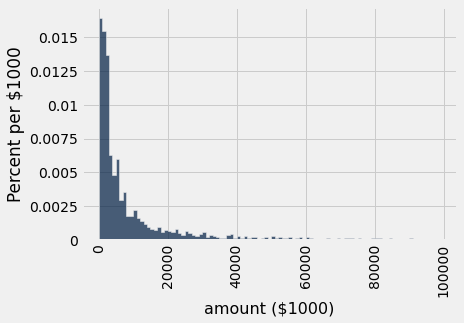

In [15]:
ceos.hist('amount', bins=np.arange(0, 1e5, 1e3), unit='$1000')

Join the the CEO data with the billionaires data based on `'name'` and `'ceo'`.

In [16]:
b_donations = billionaires.join('name', ceos, 'ceo')
b_donations.show()

name,citizenship,net worth,industry,Continent,company,party,amount
Barry Diller,United States,5479965153,Technology,North America,Coca-Cola Co,100,107500
Carl Icahn,United States,20515698449,Diversified,North America,CVR Energy,100,3000
Carl Icahn,United States,20515698449,Diversified,North America,CVR Energy,200,225900
Charles Dolan,United States,5387774353,Media & Telecom,North America,Cablevision,100,39400
Charles Dolan,United States,5387774353,Media & Telecom,North America,Cablevision,200,107000
Charles Johnson,United States,4587892463,Finance,North America,Franklin Resources,200,858000
Charles Koch,United States,61046822719,Industrial,North America,Assurant,100,1500
Charles Koch,United States,61046822719,Industrial,North America,Assurant,200,25400
Charles Schwab,United States,9063879795,Finance,North America,Charles Schwab Corp,100,1800
Charles Schwab,United States,9063879795,Finance,North America,Charles Schwab Corp,200,1.2364e+06


Visualize the relationship between the values of `'net worth'` and `'amount'` where the `'amount'` values are less than 6,000,000.

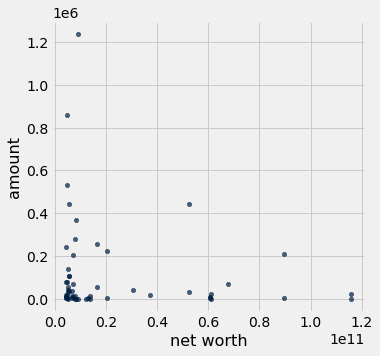

In [17]:
b_donations.where('amount', are.below(6e6)).scatter('net worth', 'amount')

Create a table with the columns: 

`'name',
 'citizenship',
 'net worth',
 'industry',
 'Continent',
 'company',
 'party',
 'amount',
 'Contribution%'`
 
 `'Contributions%'` represents the percentage of the billionaire's net worth contributed to the specified party.

In [18]:
donation_prop = b_donations.column('amount') / b_donations.column('net worth')
b_donations = b_donations.with_column('Contribution%', donation_prop)
b_donations = b_donations.sort('amount', descending=True)
b_donations.set_format('Contribution%', PercentFormatter)
b_donations.show(20)

name,citizenship,net worth,industry,Continent,company,party,amount,Contribution%
Sheldon Adelson,United States,38008857087,Entertainment,North America,Las Vegas Sands,200,6.20425e+06,0.02%
Charles Schwab,United States,9063879795,Finance,North America,Charles Schwab Corp,200,1.2364e+06,0.01%
Charles Johnson,United States,4587892463,Finance,North America,Franklin Resources,200,858000,0.02%
Kelcy Warren,United States,4595072119,Energy,North America,Energy Transfer,200,529886,0.01%
Jim Walton,United States,52493506006,Retail,North America,Wal-Mart Stores Inc,200,444700,0.00%
Ray Hunt,United States,5421192714,Energy,North America,PepsiCo Inc,200,442364,0.01%
Richard Kinder,United States,8398076785,Energy,North America,Kinder Morgan,200,368000,0.00%
John Malone,United States,8069296402,Media & Telecom,North America,Liberty Global,200,280050,0.00%
Eric Schmidt,United States,16579148665,Technology,North America,google,100,257300,0.00%
Reed Hastings,United States,4569628489,Technology,North America,Facebook,100,241700,0.01%


### Demo: Meteorites

Load and explore the `meteorites_na.csv` data.

In [19]:
meteorites = Table.read_table('meteorites_na.csv')
meteorites

name,class,mass,how,year,lat,lon
Abee,EH4,107000,Fell,1952,54.2167,-113
Acapulco,Acapulcoite,1914,Fell,1976,16.8833,-99.9
Allegan,H5,32000,Fell,1899,42.5333,-85.8833
Allende,CV3,2e+06,Fell,1969,26.9667,-105.317
Andover,L6,3200,Fell,1898,44.6167,-70.75
Archie,H6,5070,Fell,1932,38.5,-94.3
Ash Creek,L6,9500,Fell,2009,31.805,-97.01
Atemajac,L6,94.2,Fell,1896,20.0667,-103.667
Athens,LL6,265,Fell,1933,34.75,-87
Atoka,L6,1384.2,Fell,1945,34.3167,-96.15


In [21]:
meteorites.group('class').sort(1, descending=True)

class,count
H5,293
L6,278
H4,186
L5,136
H6,132
"Iron, IIIAB",124
L4,53
OC,43
"Iron, IIAB",42
"Iron, IAB-MG",37


In [22]:
meteorites.group('how')

how,count
Fell,181
Found,1626


In [23]:
meteorites.group('how', np.average)

how,name average,class average,mass average,year average,lat average,lon average
Fell,,,38316.9,1926.62,37.2264,-93.3681
Found,,,132638,1958.22,36.206,-103.928


Visualize the distributions of the `'year'` values for each value of `'how'`.

/opt/conda/lib/python3.9/site-packages/datascience/tables.py:920: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  values = np.array(tuple(values))


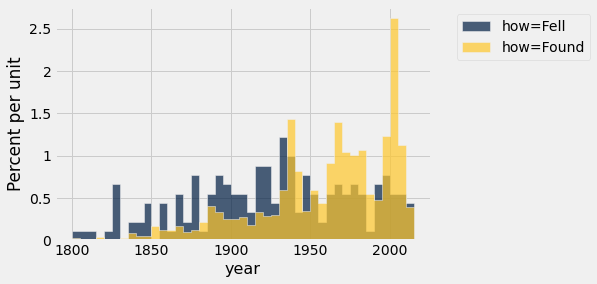

In [24]:
meteorites.hist('year', bins=np.arange(1800, 2020, 5), group='how')


Visualize the relationship between `'year'` and `'mass'`. Consider ignoring some of the outliers.

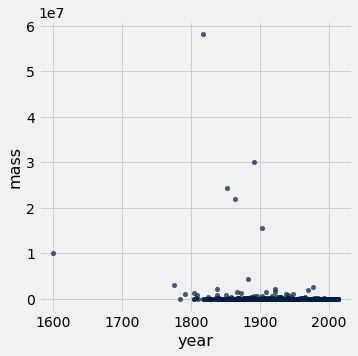

In [25]:
meteorites.scatter('year', 'mass')

In [27]:
smaller = meteorites.where('mass', are.below(1e5))
smaller

name,class,mass,how,year,lat,lon
Acapulco,Acapulcoite,1914,Fell,1976,16.8833,-99.9
Allegan,H5,32000,Fell,1899,42.5333,-85.8833
Andover,L6,3200,Fell,1898,44.6167,-70.75
Archie,H6,5070,Fell,1932,38.5,-94.3
Ash Creek,L6,9500,Fell,2009,31.805,-97.01
Atemajac,L6,94.2,Fell,1896,20.0667,-103.667
Athens,LL6,265,Fell,1933,34.75,-87
Atoka,L6,1384.2,Fell,1945,34.3167,-96.15
Avilez,H,146,Fell,1855,25,-103.5
Aztec,L6,2830,Fell,1938,36.8,-108


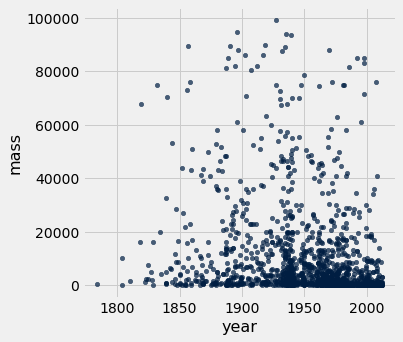

In [28]:
smaller.scatter('year', 'mass')

Create tables for the fell and found meteorites are the year 1950.

In [29]:
new_fell = meteorites.where('how', 'Fell').where('year', are.above(1950))
new_found  = meteorites.where('how', 'Found').where('year', are.above(1950))
new_found

name,class,mass,how,year,lat,lon
Abajo,H5,331,Found,1982,26.8,-105.417
Abbott,H3-6,21100,Found,1951,36.3,-104.283
Ackerly,L5,3046,Found,1995,32.5903,-101.772
Acomita,"Pallasite, PMG",3956,Found,1962,35.05,-107.567
Acuña,"Iron, IIIAB",217700,Found,1981,29.3167,-100.967
Akron (1961),L6,4000,Found,1961,40.15,-103.167
Albion,"Iron, IVA",12280,Found,1966,46.8333,-117.25
Aldama (a),"Iron, IIIAB",11000,Found,1985,28.8333,-105.867
Aldama (b),H5,66.5,Found,1996,25.05,-106
Alkali,H6,30.47,Found,1998,37.8667,-117.4


### Demo: Maps

Visualize the locations of the fell and found meteorites after 1950.

In [30]:
Marker.map_table(new_fell.select('lat', 'lon', 'name'))

In [31]:
Circle.map_table(new_found.select('lat', 'lon', 'name'), area=10)

### Demo: Bikes

Load the `trip.csv` data.

* *If you loaded the meteorites dataset above, now might be a good time to restart your kernel, run the cell at the top of the notebook, then come back here.*
* *The bike datasets in this section is big, and could lead to kernel crashes.*

In [1]:
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter(action='ignore',category=np.VisibleDeprecationWarning)

In [2]:
# To avoid crashing the kernel, let's focus on specific data:
trip = Table.read_table('trip.csv').where('Duration', are.below(1800)).select(
    "Duration", "Start Date", "Start Station", "End Date", "End Station")
trip

Duration,Start Date,Start Station,End Date,End Station
765,8/31/2015 23:26,Harry Bridges Plaza (Ferry Building),8/31/2015 23:39,San Francisco Caltrain (Townsend at 4th)
1036,8/31/2015 23:11,San Antonio Shopping Center,8/31/2015 23:28,Mountain View City Hall
307,8/31/2015 23:13,Post at Kearny,8/31/2015 23:18,2nd at South Park
409,8/31/2015 23:10,San Jose City Hall,8/31/2015 23:17,San Salvador at 1st
789,8/31/2015 23:09,Embarcadero at Folsom,8/31/2015 23:22,Embarcadero at Sansome
293,8/31/2015 23:07,Yerba Buena Center of the Arts (3rd @ Howard),8/31/2015 23:12,San Francisco Caltrain (Townsend at 4th)
896,8/31/2015 23:07,Embarcadero at Folsom,8/31/2015 23:22,Embarcadero at Sansome
255,8/31/2015 22:16,Embarcadero at Sansome,8/31/2015 22:20,Steuart at Market
126,8/31/2015 22:12,Beale at Market,8/31/2015 22:15,Temporary Transbay Terminal (Howard at Beale)
932,8/31/2015 21:57,Post at Kearny,8/31/2015 22:12,South Van Ness at Market


Visualize the distribution of trip durations less than 1800 seconds. Use a few different different bins in the visualizations.

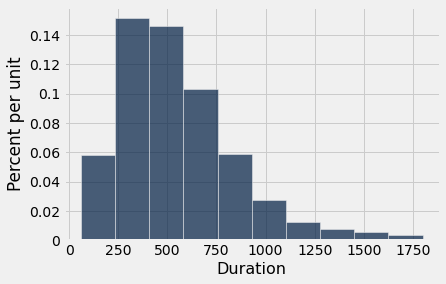

In [3]:
trip.hist('Duration')

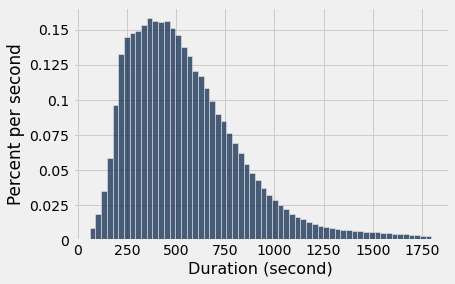

In [4]:
trip.hist('Duration', bins=60, unit='second')

In [5]:
# Approximate percent of people who have a ride duration between 500 and 250 seconds
(500-250) * 0.15 

37.5

Group the trips that are less than 1800 seconds by starting station.

In [6]:
starts = trip.group('Start Station').sort('count', descending=True)
starts

Start Station,count
San Francisco Caltrain (Townsend at 4th),25858
San Francisco Caltrain 2 (330 Townsend),21523
Harry Bridges Plaza (Ferry Building),15543
Temporary Transbay Terminal (Howard at Beale),14298
2nd at Townsend,13674
Townsend at 7th,13579
Steuart at Market,13215
Embarcadero at Sansome,12842
Market at 10th,11523
Market at Sansome,11023


Cross-classify the trips based on start and end stations.

In [8]:
trip.pivot('Start Station', 'End Station')

End Station,2nd at Folsom,2nd at South Park,2nd at Townsend,5th at Howard,Adobe on Almaden,Arena Green / SAP Center,Beale at Market,Broadway St at Battery St,California Ave Caltrain Station,Castro Street and El Camino Real,Civic Center BART (7th at Market),Clay at Battery,Commercial at Montgomery,Cowper at University,Davis at Jackson,Embarcadero at Bryant,Embarcadero at Folsom,Embarcadero at Sansome,Embarcadero at Vallejo,Evelyn Park and Ride,Franklin at Maple,Golden Gate at Polk,Grant Avenue at Columbus Avenue,Harry Bridges Plaza (Ferry Building),Howard at 2nd,Japantown,MLK Library,Market at 10th,Market at 4th,Market at Sansome,Mechanics Plaza (Market at Battery),Mezes Park,Mountain View Caltrain Station,Mountain View City Hall,Palo Alto Caltrain Station,Park at Olive,Paseo de San Antonio,Post at Kearny,Powell Street BART,Powell at Post (Union Square),Redwood City Caltrain Station,Redwood City Medical Center,Redwood City Public Library,Rengstorff Avenue / California Street,Ryland Park,SJSU - San Salvador at 9th,SJSU 4th at San Carlos,San Antonio Caltrain Station,San Antonio Shopping Center,San Francisco Caltrain (Townsend at 4th),San Francisco Caltrain 2 (330 Townsend),San Francisco City Hall,San Jose City Hall,San Jose Civic Center,San Jose Diridon Caltrain Station,San Mateo County Center,San Pedro Square,San Salvador at 1st,Santa Clara County Civic Center,Santa Clara at Almaden,South Van Ness at Market,Spear at Folsom,St James Park,Stanford in Redwood City,Steuart at Market,Temporary Transbay Terminal (Howard at Beale),Townsend at 7th,University and Emerson,Washington at Kearny,Yerba Buena Center of the Arts (3rd @ Howard)
2nd at Folsom,54,190,554,107,0,0,40,21,0,0,44,78,54,0,9,77,32,41,14,0,0,11,30,416,53,0,0,169,114,302,33,0,0,0,0,0,0,60,121,88,0,0,0,0,0,0,0,0,0,694,445,21,0,0,0,0,0,0,0,0,38,57,0,0,39,237,342,0,17,31
2nd at South Park,295,164,71,180,0,0,208,85,0,0,112,87,160,0,37,56,178,83,116,0,0,57,73,574,500,0,0,139,199,1633,119,0,0,0,0,0,0,299,84,113,0,0,0,0,0,0,0,0,0,559,480,48,0,0,0,0,0,0,0,0,66,152,0,0,374,429,143,0,63,209
2nd at Townsend,437,151,185,92,0,0,608,350,0,0,80,329,168,0,386,361,658,506,254,0,0,27,315,2607,295,0,0,110,225,845,177,0,0,0,0,0,0,120,100,141,0,0,0,0,0,0,0,0,0,905,299,14,0,0,0,0,0,0,0,0,72,508,0,0,2349,784,417,0,57,166
5th at Howard,113,177,148,83,0,0,59,130,0,0,203,76,129,0,30,57,49,166,54,0,0,85,78,371,478,0,0,303,158,168,90,0,0,0,0,0,0,93,183,169,0,0,0,0,0,0,0,0,0,690,1859,48,0,0,0,0,0,0,0,0,116,102,0,0,182,750,200,0,43,267
Adobe on Almaden,0,0,0,0,11,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17,7,0,0,0,0,0,0,0,0,0,25,0,0,0,0,0,0,0,7,7,16,0,0,0,0,0,19,23,265,0,20,4,5,10,0,0,14,0,0,0,0,0,0,0
Arena Green / SAP Center,0,0,0,0,7,64,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16,5,0,0,0,0,0,0,0,0,0,21,0,0,0,0,0,0,0,24,3,7,0,0,0,0,0,6,20,7,0,56,12,38,259,0,0,13,0,0,0,0,0,0,0
Beale at Market,127,79,183,59,0,0,59,661,0,0,201,75,101,0,247,178,38,590,165,0,0,54,435,57,72,0,0,286,236,163,26,0,0,0,0,0,0,49,227,179,0,0,0,0,0,0,0,0,0,640,269,25,0,0,0,0,0,0,0,0,243,128,0,0,16,167,35,0,64,45
Broadway St at Battery St,67,89,279,119,0,0,1022,110,0,0,62,283,226,0,191,198,79,231,35,0,0,5,70,168,49,0,0,32,97,341,214,0,0,0,0,0,0,169,71,218,0,0,0,0,0,0,0,0,0,685,438,7,0,0,0,0,0,0,0,0,18,106,0,0,344,748,50,0,79,47
California Ave Caltrain Station,0,0,0,0,0,0,0,0,38,1,0,0,0,29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,192,40,0,0,0,0,0,0,0,6,0,0,0,17,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,57,0,0
Castro Street and El Camino Real,0,0,0,0,0,0,0,0,0,30,0,0,0,0,0,0,0,0,0,14,0,0,0,0,0,0,0,0,0,0,0,0,931,34,0,0,0,0,0,0,0,0,0,7,0,0,0,4,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Reduce the table to only include the start and end stations along with the duration of each trip.

In [ ]:
duration = trip.select('Start Station', 'End Station', 'Duration')
duration

**We ran out of memory here, so couldn't go farther.  I'll work on a solution before class Wednesday, and complete the lecture then.**

Identify the shortest trip for each start and end station combination.

In [ ]:
shortest = duration.group(['Start Station', 'End Station'], min).relabeled('Duration min', 'Minimum Duration')
shortest

Identify the shortest trips for each ending station paired with a start at Civic Center.

In [ ]:
...

### Demo: Maps, Again

Load the `station.csv` data and visualize the location of all of the stops. After that, focus on the stations in San Francisco.

In [ ]:
stations = Table.read_table('station.csv')
stations

In [ ]:
...

<footer>
    <hr>
    <p>Adopted from UC Berkeley DATA 8 course materials.</p>
    <p>This content is offered under a <a href="https://creativecommons.org/licenses/by-nc-sa/4.0/">CC Attribution Non-Commercial Share Alike</a> license.</p>
</footer>